In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('/Users/MU20414673/Krish_Naik_Project/mlproject/notebook/data/stud.csv')

In [12]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [13]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [14]:
numerical_transformer = StandardScaler()
oh_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', oh_encoder, cat_features)
    ]
)

In [15]:
X = preprocessor.fit_transform(X)

In [16]:
X.shape, y.shape

((1000, 19), (1000,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [18]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    mae = mean_absolute_error(true, predicted)
    return mae, rmse, r2

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'XGBoost': XGBRegressor(eval_metric='rmse')
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print(f"Train MAE: {train_mae}, Train RMSE: {train_rmse}, Train R2: {train_r2}")
    print(f"Test MAE: {test_mae}, Test RMSE: {test_rmse}, Test R2: {test_r2}")
    print("--------------------------------------------------")
    r2_list.append(test_r2)

Logistic Regression
Train MAE: 5.81375, Train RMSE: 8.070083642689212, Train R2: 0.7111245231714195
Test MAE: 7.28, Test RMSE: 9.144943958275523, Test R2: 0.6563222245235442
--------------------------------------------------
Linear Regression
Train MAE: 4.2667118460719555, Train RMSE: 5.323050852720513, Train R2: 0.8743172040139593
Test MAE: 4.214763142474851, Test RMSE: 5.393993869732841, Test R2: 0.8804332983749565
--------------------------------------------------
Ridge Regression
Train MAE: 4.264987823725978, Train RMSE: 5.323324922741656, Train R2: 0.8743042615212908
Test MAE: 4.2111006880142625, Test RMSE: 5.390387016935638, Test R2: 0.8805931485028738
--------------------------------------------------
Lasso Regression
Train MAE: 5.206296077972952, Train RMSE: 6.593807540619166, Train R2: 0.8071466723085148
Test MAE: 5.157879138921816, Test RMSE: 6.519688056285626, Test R2: 0.825320079562973
--------------------------------------------------
Decision Tree
Train MAE: 0.01875, Trai

In [20]:
pd.DataFrame({
    'Model': model_list,
    'R2 Score': r2_list
}).sort_values(by='R2 Score', ascending=False).reset_index(drop=True)

,Model,R2 Score
0,Ridge Regression,0.880593
1,Linear Regression,0.880433
2,Random Forest,0.853442
3,CatBoost,0.851632
4,AdaBoost,0.849109
5,Lasso Regression,0.825320
6,XGBoost,0.821221
7,Decision Tree,0.764731
8,Support Vector Regression,0.728600
9,Logistic Regression,0.656322


In [21]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"R2 Score of Linear Regression: {score:.2f}%")

R2 Score of Linear Regression: 88.04%


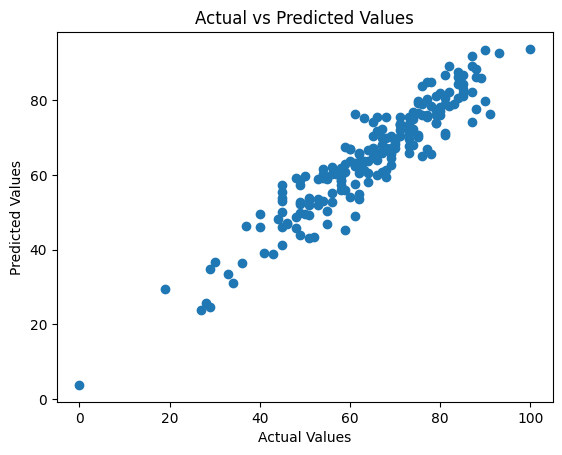

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted Values')

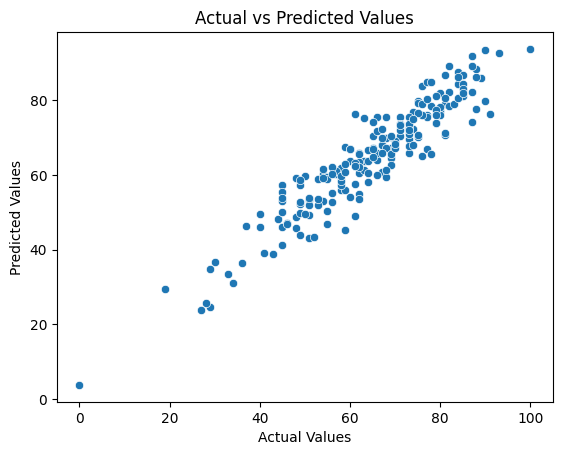

In [23]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')